#### PRNG evolution analysis with prediction attacks

The cell below contains experimental configuration settings in the form of a python dictionary.

In [1]:
from Core.Experiment import Experiment
#pip install keras-tqdm



Using TensorFlow backend.


Prng defs:  {'Middle_Square': '1946', 'Linear_Congruential': '1958', 'Lagged_Fibonacci': '1958', 'Wichmann_Hill': '1982', 'Park_Miller': '1988', 'Maximally_Periodic_Reciprocals': '1992', 'Mersenne_Twister': '1998'}

********** Lagged_Fibonacci Experiment Initiated**********

Configuration settings accepted: {'DISABLE_TQDMN': False, 'VERBOSE': 1, 'LOUD_LOGGING': True, 'IS_NEW_MODEL': True, 'PATH': './Lagged_Fibonacci/', 'SEED_METHOD': 'ticks_LF', 'PRNG_METHOD': 'Lagged_Fibonacci', 'NUM_SETS': 1000, 'SET_LEN': 2000, 'BATCH_SIZE': 15, 'NUM_EPOCHS': 5, 'CHKPNT_MONITOR': 'mae', 'CHKPNT_MODE': 'min', 'USE_VALIDATION': True, 'VALIDATION_SPLIT': 0.2, 'OVERRIDE_LOAD_COMPILATION': False, 'LR': 0.001, 'LOSS_METHOD': 'mean_absolute_error'}

Generating 1000 sets of 2000 using Lagged_Fibonacci ...

Generation Successful!

Normalizing and shaping data for training...

Training and testing sets were successfully generated with input and target data...

x_train (1000, 1999, 1)
y_train (1000,)
x_test (1

Train on 800 samples, validate on 200 samples


Epoch 1/5


800/800 [==============================] - 2s 3ms/step - loss: 0.0094 - mae: 0.0094 - val_loss: 0.0031 - val_mae: 0.0031

Epoch 00001: mae improved from inf to 0.00937, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 2/5


800/800 [==============================] - 1s 2ms/step - loss: 0.0017 - mae: 0.0017 - val_loss: 0.0015 - val_mae: 0.0015

Epoch 00002: mae improved from 0.00937 to 0.00170, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 3/5


800/800 [==============================] - 1s 2ms/step - loss: 0.0012 - mae: 0.0012 - val_loss: 0.0014 - val_mae: 0.0014

Epoch 00003: mae improved from 0.00170 to 0.00122, saving model to ./Lagged_Fibonacci/model.hd5
Epoch 4/5


800/800 [==============================] - 1s 2ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 9.1780e-04 - val_mae: 9.1780e-04

Epoch 00004: mae did not improve from 0.00122
Epoch 5/5


800/800 [==============================] - 1s 2ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 0.0015 - val_mae: 0.0015

Epoch 00005: mae did not improve from 0.00122

Training Finished!

Printing results...

History Keys:  dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


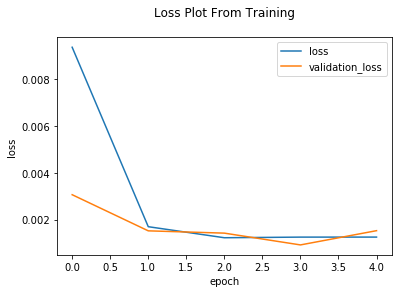

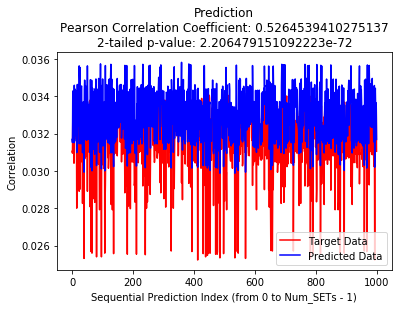


Pearson Correlation Coefficient: 0.5264539410275137
2-tailed p-value:                 2.206479151092223e-72 

Finished training, testing, and logging. Files saved to ./Lagged_Fibonacci/ 

********** Lagged_Fibonacci finished**********


In [2]:
from Core.PrngMethods import Get_Defs

defs = Get_Defs()

print('Prng defs: ',defs)  

configuration = {
        'DISABLE_TQDMN' : False,
        'VERBOSE' : 1,
        'LOUD_LOGGING': True,
    
        'IS_NEW_MODEL' : True,
        'PATH' : './Lagged_Fibonacci/',
        'SEED_METHOD' : 'ticks_LF',               
        'PRNG_METHOD' : 'Lagged_Fibonacci',       
        'NUM_SETS' : 1000,                     
        'SET_LEN': 2000,                                               
        'BATCH_SIZE': 15,
        'NUM_EPOCHS': 5,
        
        'CHKPNT_MONITOR' : 'mae',
        'CHKPNT_MODE' : 'min',
        
        
        'USE_VALIDATION' : True ,
        'VALIDATION_SPLIT' :  0.2,
    
        'OVERRIDE_LOAD_COMPILATION' : False,
        'LR': .001,
        'LOSS_METHOD':'mean_absolute_error' #mae
    }  

E = Experiment(configuration)
E.perform()

In [8]:
#Seed generator tests.

from datetime import *

def ticks():
    return  int(str( int( (datetime.utcnow() - datetime(1, 1, 1)).total_seconds() * 10000000 ))[-10:])

print(int(ticks()))

7259117184
